In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split


In [3]:
test = pd.read_csv('C:\\Users\\uphaa\\Documents\\datasets\\test_hr.csv')

In [4]:
train= pd.read_csv('C:\\Users\\uphaa\\Documents\\datasets\\train_hr.csv')

In [5]:
df3= pd.read_csv('C:\\Users\\uphaa\\Documents\\datasets\\sample_submission.csv')

In [ ]:
print(train.shape)
print(test.shape)
#54808/(54808+23490)

In [6]:
train.info()
# Education and previous_year_rating have null values and needs to be treated
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null

In [7]:
print(train.region.unique())
print(train.department.unique())
print(train.education.unique())
print(train.recruitment_channel.unique())
print(train.no_of_trainings.unique())
print(train.previous_year_rating.unique())
print(train.length_of_service.unique())


['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
["Master's & above" "Bachelor's" nan 'Below Secondary']
['sourcing' 'other' 'referred']
[ 1  2  3  4  7  5  6  8 10  9]
[ 5.  3.  1.  4. nan  2.]
[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]


In [8]:
train.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

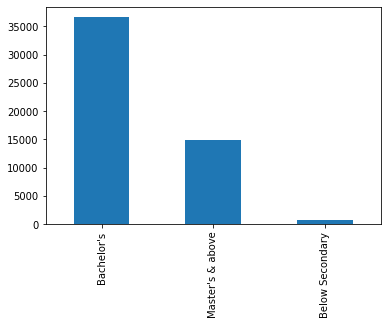

In [9]:
train.education.isna().value_counts()
train.education.value_counts().plot(kind = 'bar')
plt.show()
#Since the bachelors quantity is most,therefore filling the null values with mode. 

In [10]:
train.education.replace(np.nan,"Bachelor's",inplace = True)
test.education.replace(np.nan,"Bachelor's",inplace = True)

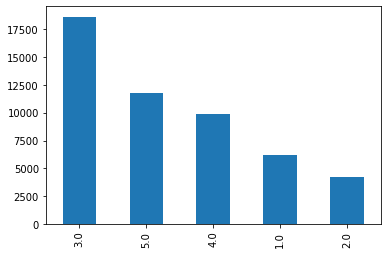

In [11]:
train.previous_year_rating.isna().value_counts()
train.previous_year_rating.value_counts().plot(kind = 'bar')
plt.show()


In [12]:
train['tech_knowledge'] = train['avg_training_score'] * train['no_of_trainings']
test['tech_knowledge'] = test['avg_training_score'] * test['no_of_trainings']

In [13]:
train.previous_year_rating.mode()

0    3.0
dtype: float64

In [28]:
train['previous_year_rating'].replace(np.nan,3,inplace = True)
test['previous_year_rating'].replace(np.nan,3,inplace = True)

In [30]:
series = pd.isnull(train['previous_year_rating'])

In [31]:
train[series]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,tech_knowledge


# Univariate Analysis

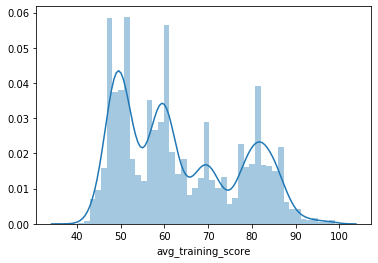

In [32]:
sns.distplot(train.avg_training_score)
#No trend for avg_training_score

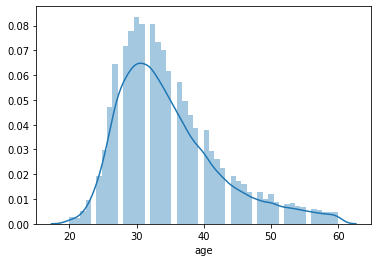

In [33]:
sns.distplot(train.age)
#Maximum candidates are of age 30-35

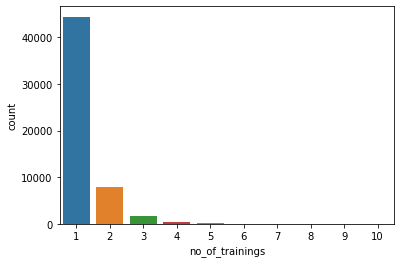

In [34]:
sns.countplot(train.no_of_trainings)
#maximum people have attended only 1 training while maximum training attained is 5

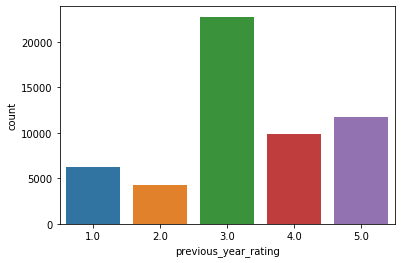

In [35]:
sns.countplot(train.previous_year_rating)
#maximum people have attained rating of 3, while mimimum is 2

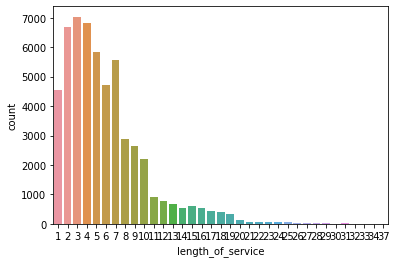

In [36]:
sns.countplot(train.length_of_service)
#the company seems to have maximum strength of people having service length of 2-5 years

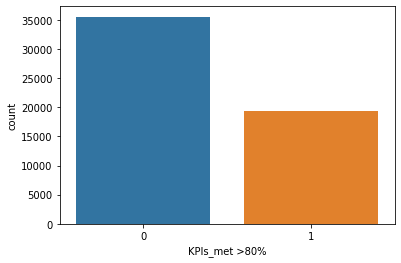

In [37]:
sns.countplot(train['KPIs_met >80%'])
#Around 30% people have met the KPI score more than 80%

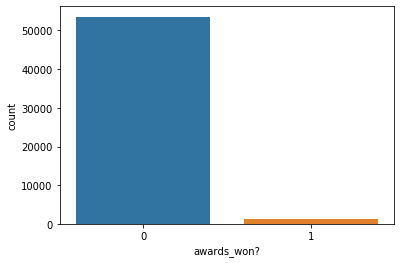

In [38]:
sns.countplot(train['awards_won?'])
# Very few people have won the awards only

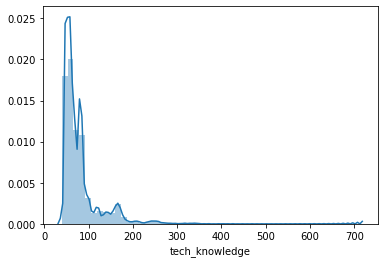

In [39]:
sns.distplot(train['tech_knowledge'])
#Technical score containing average marks and no. of trainings attended.Maximum people have score around the mean value of 80 

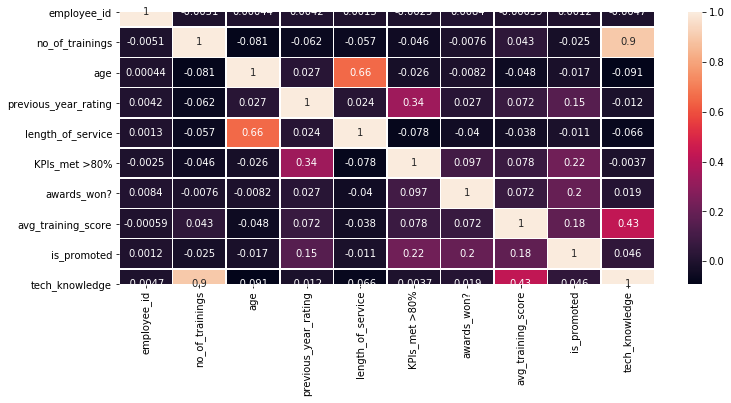

In [40]:
fig,ax= plt.subplots(1,1,figsize=(12,5))
sns.heatmap(train.corr(),linewidths=.5,ax=ax,annot= True)
plt.show()

# Bivariate Analysis

In [ ]:
train.groupby('department')['avg_training_score'].mean()

In [ ]:
fig,ax= plt.subplots(1,1,figsize=(12,5))

sns.boxplot(x='department',y='avg_training_score',data = train,ax=ax)
#Analytics and Rnd have scored maximum marks in training

In [ ]:
fig,ax= plt.subplots(1,1,figsize=(12,5))
sns.barplot('department',y='is_promoted',data = train,ax=ax)
#Technology,Procurement,Analytics candidates have higher probability of getting promoted as compared to other streams
#Although Candidates in Rnd department have higher marks scored but the promotion is not good.

In [ ]:
fig,ax= plt.subplots(1,1,figsize=(12,5))
sns.barplot(x='education',y='is_promoted',data = train,ax=ax)


In [ ]:
fig,ax= plt.subplots(1,1,figsize=(12,5))
sns.barplot('gender',y='is_promoted',data = train,ax=ax)


In [ ]:
fig,ax= plt.subplots(1,1,figsize=(12,5))
sns.barplot('recruitment_channel',y='is_promoted',data = train,ax=ax)


In [ ]:
sns.boxplot(x ='is_promoted',y='avg_training_score',data =train)

In [ ]:
sns.boxplot(x='is_promoted',y='tech_knowledge',data =train)

In [ ]:
sns.boxplot(x='is_promoted',y='length_of_service',data =train)

# Feature Engineering and one-hot encoding

In [ ]:
sns.countplot(train.department)

In [ ]:
#check for outliers -- no outliers to be removed
#get dummies -- done
#remove employee id -- done
#check for region
#modelling

In [ ]:
sns.boxplot(train.avg_training_score)

In [41]:
train =pd.get_dummies(data = train, columns =['gender','education','department','recruitment_channel'])


In [42]:
test =pd.get_dummies(data = test, columns =['gender','education','department','recruitment_channel'])

In [48]:
train.drop('employee_id',axis = 1,inplace = True)

In [49]:
test.drop('employee_id',axis = 1,inplace =True)

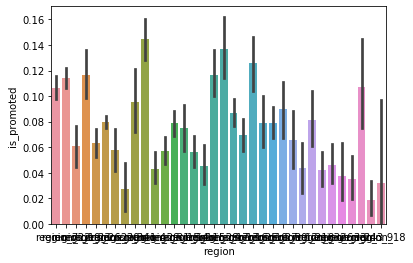

In [45]:
sns.barplot(x='region',y='is_promoted',data = train)

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [51]:
train['region'] = le.fit_transform(train['region'])
test['region'] = le.transform(test['region'])

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 26 columns):
region                          23490 non-null int32
no_of_trainings                 23490 non-null int64
age                             23490 non-null int64
previous_year_rating            23490 non-null float64
length_of_service               23490 non-null int64
KPIs_met >80%                   23490 non-null int64
awards_won?                     23490 non-null int64
avg_training_score              23490 non-null int64
tech_knowledge                  23490 non-null int64
gender_f                        23490 non-null uint8
gender_m                        23490 non-null uint8
education_Bachelor's            23490 non-null uint8
education_Below Secondary       23490 non-null uint8
education_Master's & above      23490 non-null uint8
department_Analytics            23490 non-null uint8
department_Finance              23490 non-null uint8
department_HR                   23490 non

In [61]:
xtrain = train.drop('is_promoted',axis = 1)

In [62]:
ytrain = train.is_promoted

In [64]:
xtest = test.copy()
xtest

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,tech_knowledge,gender_f,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,18,1,24,3.0,1,1,0,77,77,0,...,0,0,0,0,0,0,1,0,0,1
1,28,1,31,3.0,5,0,0,51,51,1,...,1,0,0,0,0,0,0,1,0,0
2,4,1,31,1.0,4,0,0,47,47,0,...,0,0,0,0,0,1,0,1,0,0
3,11,3,31,2.0,9,0,0,65,195,1,...,0,0,0,1,0,0,0,1,0,0
4,21,1,30,4.0,7,0,0,61,61,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,11,1,24,3.0,1,0,0,61,61,0,...,0,1,0,0,0,0,0,0,0,1
23486,17,1,31,3.0,7,0,0,74,74,0,...,0,0,0,0,0,0,1,0,0,1
23487,7,1,26,4.0,4,0,0,50,50,1,...,1,0,0,0,0,0,0,0,0,1
23488,24,3,27,3.0,1,0,0,70,210,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
#preprocessing part- cross val,grid search,confusion matrix
#logistic
#knn
#decision tree
#voting classifier
#random forest
#bagging
#boosting

## Logistic

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

In [77]:
logreg = LogisticRegression()
params = {'C':np.arange(1,20)}
grid_cv = GridSearchCV(estimator = logreg,param_grid = params,cv = 5)


In [78]:
grid_cv.fit(xtrain,ytrain)

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
grid_cv.best_params_

{'C': 8}

In [81]:
logreg = LogisticRegression(C=8)
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
df3['is_promoted'] = ypred

In [86]:
df3.to_csv('HR_sol1.csv',columns = ['employee_id', 'is_promoted'], index = False)

In [ ]:
#using gridcv score was increased

## Cat Boost

In [97]:
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

model = CatBoostClassifier(learning_rate=0.12, n_estimators=200, max_depth=4, subsample=0.8,
                           loss_function='MultiClass', bootstrap_type='Bernoulli')

In [98]:
model.fit(xtrain,ytrain)

0:	learn: 0.6100188	total: 103ms	remaining: 20.5s
1:	learn: 0.5453203	total: 127ms	remaining: 12.5s
2:	learn: 0.4934497	total: 177ms	remaining: 11.6s
3:	learn: 0.4515146	total: 221ms	remaining: 10.8s
4:	learn: 0.4172607	total: 245ms	remaining: 9.54s
5:	learn: 0.3890178	total: 298ms	remaining: 9.64s
6:	learn: 0.3647847	total: 319ms	remaining: 8.8s
7:	learn: 0.3440585	total: 359ms	remaining: 8.61s
8:	learn: 0.3274135	total: 378ms	remaining: 8.02s
9:	learn: 0.3126913	total: 413ms	remaining: 7.84s
10:	learn: 0.3017114	total: 438ms	remaining: 7.53s
11:	learn: 0.2882368	total: 461ms	remaining: 7.23s
12:	learn: 0.2783376	total: 487ms	remaining: 7s
13:	learn: 0.2706951	total: 508ms	remaining: 6.74s
14:	learn: 0.2636814	total: 535ms	remaining: 6.59s
15:	learn: 0.2572106	total: 556ms	remaining: 6.39s
16:	learn: 0.2522350	total: 582ms	remaining: 6.26s
17:	learn: 0.2484428	total: 602ms	remaining: 6.08s
18:	learn: 0.2404572	total: 626ms	remaining: 5.97s
19:	learn: 0.2360789	total: 642ms	remaining: 

169:	learn: 0.1644221	total: 3.65s	remaining: 643ms
170:	learn: 0.1643818	total: 3.67s	remaining: 623ms
171:	learn: 0.1643441	total: 3.69s	remaining: 600ms
172:	learn: 0.1643152	total: 3.71s	remaining: 579ms
173:	learn: 0.1642764	total: 3.72s	remaining: 557ms
174:	learn: 0.1641506	total: 3.77s	remaining: 538ms
175:	learn: 0.1641049	total: 3.79s	remaining: 516ms
176:	learn: 0.1640708	total: 3.82s	remaining: 497ms
177:	learn: 0.1639808	total: 3.84s	remaining: 475ms
178:	learn: 0.1637780	total: 3.87s	remaining: 455ms
179:	learn: 0.1637624	total: 3.89s	remaining: 433ms
180:	learn: 0.1637240	total: 3.91s	remaining: 411ms
181:	learn: 0.1636107	total: 3.94s	remaining: 389ms
182:	learn: 0.1635756	total: 3.95s	remaining: 367ms
183:	learn: 0.1634359	total: 3.97s	remaining: 345ms
184:	learn: 0.1633105	total: 3.99s	remaining: 323ms
185:	learn: 0.1632869	total: 4.01s	remaining: 302ms
186:	learn: 0.1631807	total: 4.03s	remaining: 280ms
187:	learn: 0.1630408	total: 4.04s	remaining: 258ms
188:	learn: 

In [99]:
ypred = model.predict(xtest)

In [101]:
df3['is_promoted'] = ypred

In [102]:
df3.to_csv('HR_sol3.csv',columns = ['employee_id', 'is_promoted'],index = False)

## Light gboost

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(max_depth= 8, learning_rate=0.0941, n_estimators=197, num_leaves= 17, reg_alpha=3.4492 , reg_lambda= 0.0422)

In [ ]:
lgbm.fit(xtrain,ytrain)

In [ ]:
ypred1 = lgbm.predict(xtest)

In [ ]:
df3['is_promoted'] = ypred1

In [ ]:
df3.to_csv('pred_promoted2.csv',columns = ['employee_id', 'is_promoted'], index = False)

## SVC

In [ ]:
from sklearn.svm import SVC

In [89]:
svc = SVC(gamma = 0.01)

In [90]:
svc.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
pred = svc.predict(xtest)

In [94]:
df3['is_promoted'] = pred

In [95]:
df3.to_csv('HR_sol2.csv',columns = ['employee_id', 'is_promoted'], index = False)

In [96]:
#Least accuracy till now

In [103]:
train

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,tech_knowledge,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,31,1,35,5.0,8,1,0,49,0,49,...,0,0,0,0,0,1,0,0,0,1
1,14,1,30,5.0,4,0,0,60,0,60,...,0,0,1,0,0,0,0,1,0,0
2,10,1,34,3.0,7,0,0,50,0,50,...,0,0,0,0,0,1,0,0,0,1
3,15,2,39,1.0,10,0,0,50,0,100,...,0,0,0,0,0,1,0,1,0,0
4,18,1,45,3.0,2,0,0,73,0,73,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,5,1,48,3.0,17,0,0,78,0,78,...,0,0,0,0,0,0,1,0,0,1
54804,19,1,37,2.0,6,0,0,56,0,56,...,0,0,1,0,0,0,0,1,0,0
54805,0,1,27,5.0,3,1,0,79,0,79,...,0,0,0,0,0,0,0,1,0,0
54806,33,1,29,1.0,2,0,0,45,0,45,...,0,0,0,0,0,1,0,0,0,1
